# 多元回归
1.如何为回归分析问题准备数据<br/>
2.对于给定的问题，如何选择线性或者非线性的分析方法<br/>
3.如何选择变量以及如何评估过拟合

## 如何为回归分析问题准备数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
news = pd.read_csv('OnlineNewsPopularity.csv',sep=',')
news.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [2]:
news.columns=[x.strip() for x in news.columns]#把列名前面的空格去掉
news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [3]:
news.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


strip()函数<br /> 
声明：s为字符串，rm为要删除的字符序列<br />
s.strip(rm) :删除s字符串中开头、结尾处，位于 rm删除序列的字符<br />
s.lstrip(rm) :删除s字符串中开头处，位于 rm删除序列的字符<br />
s.rstrip(rm) :删除s字符串中结尾处，位于 rm删除序列的字符

In [4]:
news.columns=[x.strip(" ") for x in news.columns]#把字符串里的空格删掉
news.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

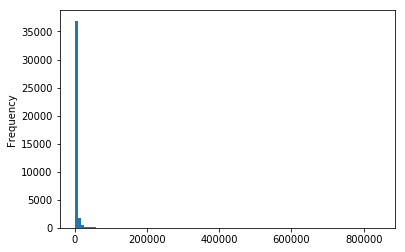

In [5]:
import matplotlib.pyplot as plt 
news['shares'].plot(kind='hist',bins=100)
plt.show()

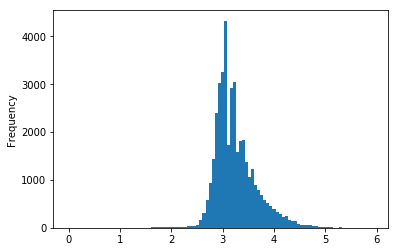

In [6]:
import numpy as np
news['shares'].map(lambda x: np.log10(x)).plot(kind='hist',bins=100)
plt.show()

经过对数变换，分布已经非常接近于正态分布

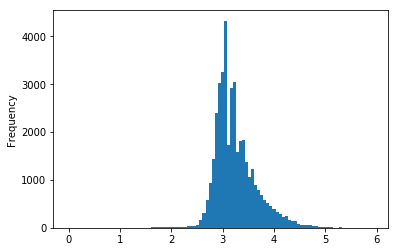

In [7]:
a=np.log10(news['shares'])
a.plot(kind='hist',bins=100)
plt.show()

In [8]:
news_trimmed_features=news.ix[:,'timedelta':'shares']#取所有的行，列从timedelta到shares

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [9]:
news_trimmed_features.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [10]:
log_values=list(news_trimmed_features.columns[news_trimmed_features.describe().reset_index().loc[7][1:]>1])
for l in log_values:
    news_trimmed_features[l]=np.log10(news_trimmed_features[l]+1)
news_trimmed_features.describe()

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,2.426203,1.049144,2.557982,0.182947,0.292131,0.221263,0.936584,0.525009,0.484858,0.173900,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3.246652
std,0.386018,0.082907,0.545231,0.044798,0.052978,0.048385,0.351538,0.300835,0.422896,0.295531,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,0.403752
min,0.954243,0.477121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.301030
25%,2.217484,1.000000,2.392697,0.167574,0.301030,0.211051,0.698970,0.301030,0.301030,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,2.976350
50%,2.531479,1.041393,2.612784,0.187302,0.301030,0.228009,0.954243,0.602060,0.301030,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,3.146438
75%,2.734800,1.113943,2.855519,0.206474,0.301030,0.244185,1.176091,0.698970,0.698970,0.301030,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,3.447313
max,2.864511,1.380211,3.928140,2.846337,3.018284,2.813581,2.484300,2.068186,2.110590,1.963788,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,5.925983


## 对于给定的问题，如何选择线性或者非线性的分析方法

In [11]:
news_trimmed_features=news_trimmed_features.replace([np.inf,-np.inf],np.nan)
news_trimmed_features=news_trimmed_features.fillna(method='pad')#把列中的NaN替换为列中前一个值
news_response=news_trimmed_features['shares']
news_trimmed_features=news_trimmed_features.ix[:,'timedelta':'abs_title_sentiment_polarity']

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


fillna(method="pad")中，method还可以为‘backfill’, ‘bfill’, ‘pad’, ‘ffill’,pad <br/>
ffill为把列中的NaN替换为列中前一个有效值 <br/>
backfill/bfill为把列中的NaN替换为列中后一个有效值 <br/>
fillna(0)为把列中的NaN替换为0。

In [12]:
news_trimmed_features = news_trimmed_features.drop('weekday_is_sunday',1)#删除weekday_is_sunday这一列
news_trimmed_features = news_trimmed_features.drop('LDA_00',1)#删除LDA_00这一列

In [14]:
from sklearn import cross_validation
news_features_train,news_features_test,news_shares_train,news_shares_test=\
cross_validation.train_test_split(news_trimmed_features,news_response,test_size=0.15,random_state=0)

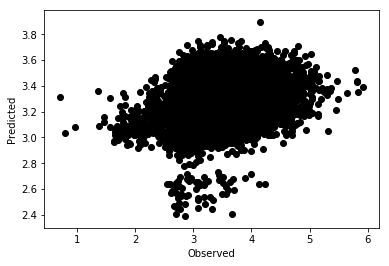

In [15]:
from sklearn import linear_model
lmodel=linear_model.LinearRegression().fit(news_features_train,news_shares_train)
plt.scatter(news_shares_train,lmodel.predict(news_features_train),color='black')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

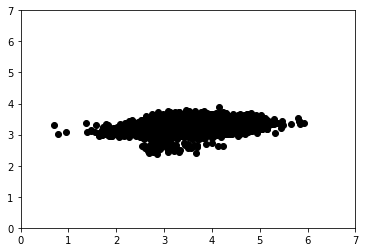

In [16]:
plt.scatter(news_shares_train,lmodel.predict(news_features_train),color='black')
plt.xlim(xmax=7,xmin=0)
plt.ylim(ymax=7,ymin=0)
plt.show()

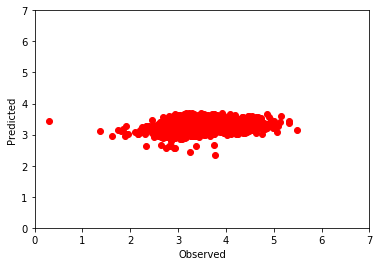

In [17]:
plt.scatter(news_shares_test,lmodel.predict(news_features_test),color='red')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.xlim(xmax=7,xmin=0)
plt.ylim(ymax=7,ymin=0)
plt.show()

In [18]:
lmodel.score(news_features_train,news_shares_train)#计算训练集上的R^2

0.12334286073433233

In [19]:
lmodel.score(news_features_test,news_shares_test)#计算测试集上的R^2

0.11460685581202945

In [20]:
ix=np.argsort(abs(lmodel.coef_))[::-1][:]
news_trimmed_features.columns[ix]

Index(['n_unique_tokens', 'n_non_stop_unique_tokens', 'kw_avg_avg',
       'n_non_stop_words', 'global_rate_positive_words',
       'self_reference_avg_sharess', 'global_subjectivity', 'LDA_02', 'LDA_01',
       'LDA_03', 'self_reference_max_shares', 'num_keywords',
       'data_channel_is_entertainment', 'min_positive_polarity',
       'num_self_hrefs', 'n_tokens_content', 'average_token_length', 'LDA_04',
       'data_channel_is_bus', 'num_hrefs', 'is_weekend', 'rate_positive_words',
       'kw_max_max', 'data_channel_is_lifestyle', 'data_channel_is_world',
       'num_videos', 'global_sentiment_polarity', 'n_tokens_title',
       'abs_title_subjectivity', 'kw_max_avg', 'num_imgs',
       'rate_negative_words', 'data_channel_is_socmed',
       'self_reference_min_shares', 'title_sentiment_polarity',
       'weekday_is_wednesday', 'weekday_is_tuesday', 'weekday_is_thursday',
       'kw_min_avg', 'avg_positive_polarity', 'avg_negative_polarity',
       'title_subjectivity', 'kw_avg_max

越靠前的变量对模型的作用越显著。（回归系数的绝对值越大，表明其自变量对因变量的影响越大。）

## 如何选择变量以及如何评估过拟合

In [21]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
result=sm.OLS(news_response,news_trimmed_features).fit()
result.summary()

D:\Python\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     98.80
Date:                Mon, 17 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:44:18   Log-Likelihood:                -17704.
No. Observations:               39644   AIC:                         3.552e+04
Df Residuals:                   39587   BIC:                         3.601e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
timedelta                         0.0142      0.006      2.322      0.020       0.002       0.026
n_tokens_title                    0.0640      0.024      2.626      0.009       0.016       0.112
n_tokens_content                 -0.0897      0.020     -4.451      0.000      -0.129      -0.050
n_unique_tokens                  -1.3315      0.320     -4.164      0.000      -1.958      -0.705
n_non_stop_words                  0.8054      0.215      3.740      0.000       0.383       1.228
n_non_stop_unique_tokens          0.5612      0.233      2.411      0.016       0.105       1.017
num_hrefs                         0.0973      0.008     11.474      0.000       0.081       0.114
num_self_hrefs                   -0.1083      0.011     -9.649      0.000      -0.130      -0.086
num_imgs                          0.0487      0.006      7.981      0.000       0.037       0.061
num_videos                        0.0667      0.008      8.620      0.000       0.052       0.082
average_token_length             -0.2459      0.103     -2.390      0.017      -0.448      -0.044
num_keywords                      0.1209      0.024      5.130      0.000       0.075       0.167
data_channel_is_lifestyle        -0.0592      0.013     -4.545      0.000      -0.085      -0.034
data_channel_is_entertainment    -0.1166      0.008    -14.059      0.000      -0.133      -0.100
data_channel_is_bus              -0.0982      0.013     -7.829      0.000      -0.123      -0.074
data_channel_is_socmed            0.0496      0.012      4.049      0.000       0.026       0.074
data_channel_is_tech              0.0190      0.012      1.557      0.119      -0.005       0.043
data_channel_is_world            -0.0581      0.012     -4.702      0.000      -0.082      -0.034
kw_min_min                        0.0088      0.004      2.469      0.014       0.002       0.016
kw_max_min                        0.0170      0.005      3.260      0.001       0.007       0.027
kw_avg_min                       -0.0185      0.008     -2.433      0.015      -0.033      -0.004
kw_min_max                        0.0165      0.007      2.441      0.015       0.003       0.030
kw_max_max                       -0.0811      0.016     -5.173      0.000      -0.112      -0.050
kw_avg_max                       -0.0332      0.018     -1.822      0.069      -0.069       0.003
kw_min_avg                       -0.0267      0.008     -3.354      0.001      -0.042      -0.011
kw_max_avg                       -0.0745      0.022     -3.411      0.001      -0.117      -0.032
kw_avg_avg                        0.4550      0.033     13.937      0.000       0.391       0.519
self_reference_min_shares        -0.0408      0.010     -3.902      0.000      -0.061      -0.020
self_reference_max_shares        -0.1309     

Df model:模型中独立参数的个数，即自由度。<br />
Df residuals:模型误差估计中所包含的独立信息的数量。即残差自由度n-m-1。<br />
Covariance type:模型中所使用的协方差的类型。<br />
Adj.R-squared:调整的R方。

$$ R_a^2=R^2-\frac{p}{n-p-1}{(1-R^2)}$$

In [22]:
model_formula=news_response.name+"~"+"+".join(news_trimmed_features.columns)

In [23]:
news_all_data=pd.concat([news_trimmed_features,news_response],axis=1)
results=smf.ols(formula=model_formula,data=news_all_data).fit()

In [24]:
lmodel_ridge=linear_model.RidgeCV().fit(news_features_train,news_shares_train)
lmodel_ridge.alpha_#岭回归中选择最优的惩罚项系数

0.1

In [25]:
lmodel_ridge.score(news_features_test,news_shares_test)#岭回归中下的R^2

0.11405916062298516

In [26]:
lmodel_lasso=linear_model.LassoCV(max_iter=10000).fit(news_features_train,news_shares_train)
lmodel_lasso.alpha_#lasso回归中选择最优的惩罚项系数

6.187128138080873e-05

In [27]:
lmodel_lasso.score(news_features_test,news_shares_test)#lasso回归下的R^2

0.11543518110022555